In [2]:
from dolfin import *
import numpy as np

In [3]:
n_1=5
n_2=10
n_3=25
n_4=100

In [4]:
# Comencem amb n_1 = 5
# Definim una quadrícula 5x5 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(n_1, n_1)
V = FunctionSpace(mesh, "Lagrange", 1)

In [5]:
# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

In [6]:
# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

In [7]:
# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

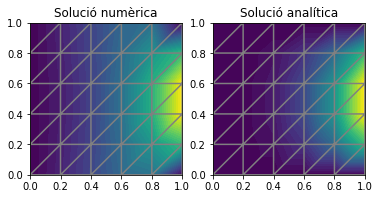

In [8]:
# Fem un plot de la solució
import matplotlib.pyplot as plt
plt.subplot(121)
plot(u)
plot(mesh)
plt.title("Solució numèrica")

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

plt.subplot(122)
plot(u_a_V2)
plot(mesh)
plt.title("Solució analítica")


plt.show()

In [9]:
# Calculem l'error
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_V2 = interpolate(u,V2)
error = (u_V2-u_a_V2)**2*dx #error a cada punt de l'àrea
error_mitj = sqrt(assemble(error))
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_1 = E
print(f"Error : {error_mitj:.2e}")
print(f"Error local màxim : {E:.2e}")


Error : 3.55e-02
Error local màxim : 9.08e-02


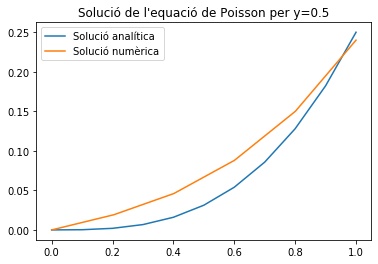

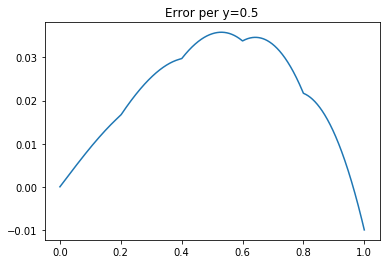

In [10]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.5.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 2)
u_a_y_05 = Expression("0.5*0.5*x[0]*x[0]*x[0]",degree=3)
u_a_05_V = interpolate(u_a_y_05,V_1d)
plot(u_a_05_V, label='Solució analítica')


# Ara amb la funció numèrica
eix_x = np.linspace(0, 1, 1000)
u_y_05 = np.zeros(1000)

for i, x in enumerate(eix_x):
    u_y_05[i] = u(x,0.5)

    
plt.plot(eix_x, u_y_05, label= 'Solució numèrica')
plt.legend()
plt.title("Solució de l'equació de Poisson per y=0.5")

plt.show()

# Representem ara la diferència entre les dos funcions

error_05 = np.zeros(1000)
for i, x in enumerate(eix_x):
    error_05[i] = u_y_05[i] - u_a_y_05(x)
plt.plot(eix_x, error_05)
plt.title("Error per y=0.5")

plt.show()


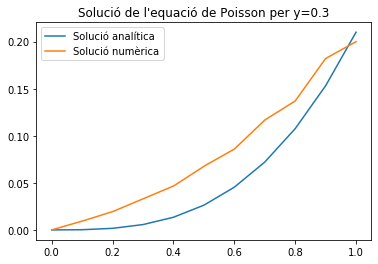

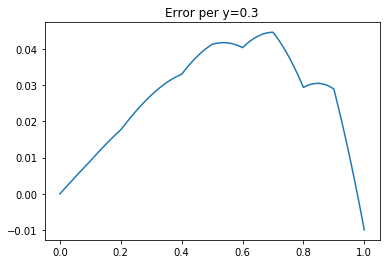

In [11]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.3.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 2)
u_a_y_03 = Expression("0.3*0.7*x[0]*x[0]*x[0]",degree=3)
u_a_03_V = interpolate(u_a_y_03,V_1d)
plot(u_a_03_V, label='Solució analítica')


# Ara amb la funció numèrica
eix_x = np.linspace(0, 1, 1000)
u_y_03 = np.zeros(1000)

for i, x in enumerate(eix_x):
    u_y_03[i] = u(x,0.3)

plt.plot(eix_x, u_y_03, label= 'Solució numèrica')
plt.title("Solució de l'equació de Poisson per y=0.3")
plt.legend()
plt.show()

# Representem ara la diferència entre les dos funcions

error_03 = np.zeros(1000)
for i, x in enumerate(eix_x):
    error_03[i] = u_y_03[i] - u_a_y_03(x)
plt.plot(eix_x, error_03)
plt.title("Error per y=0.3")
plt.show()


In [12]:
# ___________________________________________________________________________________________________________________________
# n_2 = 10

# Definim una quadrícula 10x10 en un domini [0,1]x[0,1]

mesh = UnitSquareMesh(n_2, n_2)
V = FunctionSpace(mesh, "Lagrange", 1)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

# Calculem l'error màxim
u_V2 = interpolate(u,V2)
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_2 = E
print(f"Error local màxim : {E:.2e}")



Error local màxim : 1.05e-01


In [13]:
# ___________________________________________________________________________________________________________________________
# n_3 = 25

# Definim una quadrícula x100 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(n_3, n_3)
V = FunctionSpace(mesh, "Lagrange", 1)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

# Calculem l'error màxim
u_V2 = interpolate(u,V2)
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_3 = E
print(f"Error local màxim : {E:.2e}")



Error local màxim : 1.09e-01


In [14]:
# ___________________________________________________________________________________________________________________________
# n_4 = 10

# Definim una quadrícula 100x100 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(n_4, n_4)
V = FunctionSpace(mesh, "Lagrange", 1)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

# Calculem l'error màxim
u_V2 = interpolate(u,V2)
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_4 = E
print(f"Error local màxim : {E:.2e}")



Error local màxim : 1.10e-01


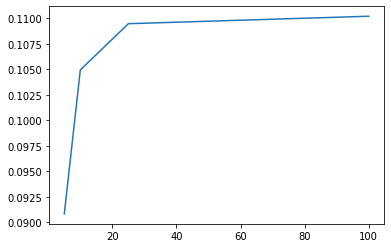

In [15]:
N=[n_1,n_2,n_3,n_4]
e_max=[E_1,E_2,E_3,E_4] #llista dels diferents errors màxims en funció de les divisions de la quadrícula
plt.plot(N,e_max)
plt.show()

In [16]:
# Ara veurem l'efecte que té el grau de l'espai de funcions
# ___________________________________________________________________________________________________________________________
# n_1 = 5

# Definim una quadrícula 5x5 en un domini [0,1]x[0,1]

mesh = UnitSquareMesh(n_2, n_2)
V = FunctionSpace(mesh, "Lagrange", 2)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

# Calculem l'error màxim
u_V2 = interpolate(u,V2)
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_1 = E
print(f"Error local màxim : {E:.2e}")


# ___________________________________________________________________________________________________________________________
# n_2 = 10

# Definim una quadrícula 10x10 en un domini [0,1]x[0,1]

mesh = UnitSquareMesh(n_2, n_2)
V = FunctionSpace(mesh, "Lagrange", 2)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

# Calculem l'error màxim
u_V2 = interpolate(u,V2)
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_2 = E
print(f"Error local màxim : {E:.2e}")

# ___________________________________________________________________________________________________________________________
# n_3 = 25

# Definim una quadrícula x100 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(n_3, n_3)
V = FunctionSpace(mesh, "Lagrange", 2)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

# Calculem l'error màxim
u_V2 = interpolate(u,V2)
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_3 = E
print(f"Error local màxim : {E:.2e}")

# ___________________________________________________________________________________________________________________________
# n_4 = 10

# Definim una quadrícula 100x100 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(n_4, n_4)
V = FunctionSpace(mesh, "Lagrange", 2)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

# Calculem l'error màxim
u_V2 = interpolate(u,V2)
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
E_4 = E
print(f"Error local màxim : {E:.2e}")




Error local màxim : 1.10e-01
Error local màxim : 1.10e-01
Error local màxim : 1.10e-01
Error local màxim : 1.10e-01


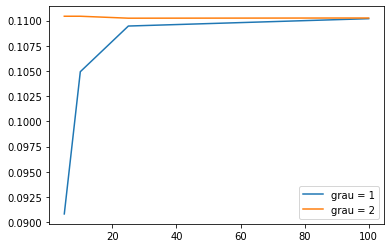

In [17]:
N=[n_1,n_2,n_3,n_4]
e_max_2=[E_1,E_2,E_3,E_4] #llista dels diferents errors màxims en funció de les divisions de la quadrícula
plt.plot(N,e_max, label = 'grau = 1')

plt.plot(N,e_max_2, label = 'grau = 2')
plt.legend()
plt.show()

# seria interessant també mirar el temps de càlcul en funció del grau i de N!!